Karina Campos Almeida, Gabriel Islas Peraza, Jair Armando Martinez Castillo, Luis Fernando Monterrubio Cota, Cynthia Vidal Ovando

# NB5. Information Cascades

## 1. Network Simulation

A. Simulate a Random Network with N = 50 and p = 5%. Make a visualization of the graph. Make sure your network is connected.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import imageio
import os
import shutil
from matplotlib import animation
from IPython.display import Image
import numpy as np

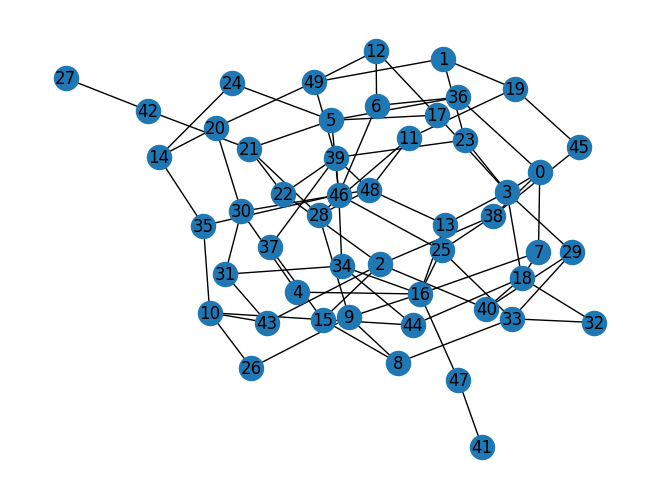

In [3]:
while True:
    random_network = nx.erdos_renyi_graph(50, 0.05)
    if nx.is_connected(random_network):
        break

nx.draw(random_network, pos=nx.kamada_kawai_layout(random_network) , with_labels=True)
plt.show()

## 2. Fractional Threshold Model
1. Implement an algorithm to simulate the information spread using the fractional threshold model. Consider a synchronous implementation.
2. Complete the following considering a copy of the network at the section 1:
    
    a) Initialize as 'Active' a random sample with 10% of the total network. The rest of the network will be initialized as 'Inactive'.
    
    b) How much nodes are vulnerable nodes?
    
    c) Simulate the information spread with $\theta = \frac{1}{2}$ until no further nodes can be activate. Plot the proportion of nodes in each state ('Active' and 'Inactive') at each step of the simulation.
    
    d) Create an animation (GIF Image) showing the state of the graph at each step.  
    

In [4]:
# Create a directory to store the frames
os.makedirs("frames", exist_ok=True)

# Initialize the network
G = random_network.copy()
theta = 0.5
nodes = G.nodes()
active_nodes = list(np.random.choice(nodes, int(0.1 * len(nodes)), replace=False))
inactive_nodes = [n for n in nodes if n not in active_nodes]

nx.set_node_attributes(G, {n: 'Inactive' for n in inactive_nodes}, 'state')
nx.set_node_attributes(G, {n: 'Active' for n in active_nodes}, 'state')

frame_index = 0

def save_frame(graph, frame_index):
    color_map = {
        'Active': 'green',
        'Inactive': 'red'
    }
    plt.figure(figsize=(8, 8))
    nx.draw(graph, pos=nx.kamada_kawai_layout(graph), node_color=[color_map[graph.nodes[n]['state']] for n in graph.nodes()], with_labels=True)
    plt.savefig(f"frames/frame_{frame_index:03d}.png")
    plt.close()

while True:
    # Save current frame
    save_frame(G, frame_index)
    frame_index += 1

    # Update
    prev_active_nodes = [n for n in active_nodes]
    new_active_nodes = []
    for n in inactive_nodes:
        node_degree = G.degree(n)
        active_neighbors = [nb for nb in G.neighbors(n) if G.nodes[nb]['state'] == 'Active']
        active_amount = len(active_neighbors)
        if active_amount / node_degree >= theta:
            new_active_nodes.append(n)

    for n in new_active_nodes:
        G.nodes[n]["state"] = "Active"
        active_nodes.append(n)
        inactive_nodes.remove(n)

    if len(prev_active_nodes) == len(active_nodes):
        break

# Save the last frame
save_frame(G, frame_index)

# Create GIF
images = []
for i in range(frame_index + 1):
    images.append(imageio.imread(f"frames/frame_{i:03d}.png"))

imageio.mimsave('diffusion.gif', images, duration=500, loop = 0)

# Cleanup frames
import shutil
shutil.rmtree("frames")

print("GIF saved as 'diffusion.gif'")

<ipython-input-4-5cbbd2f3675c>:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"frames/frame_{i:03d}.png"))


GIF saved as 'diffusion.gif'


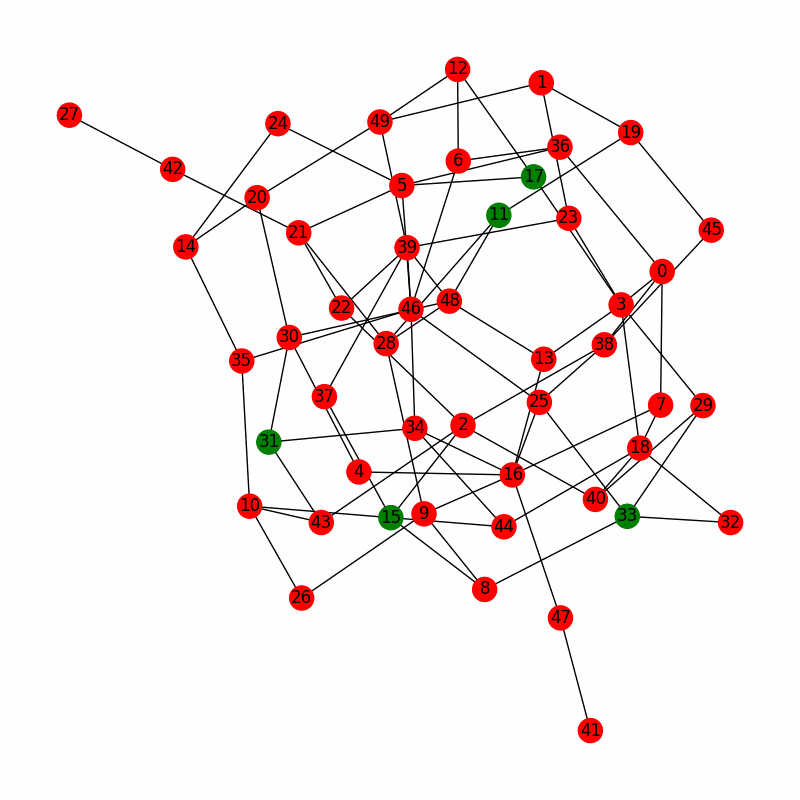

In [5]:
Image(filename='diffusion.gif')

## 3. Independent Cascade Model

1. Implement an algorithm to simulate the information spread using the a independent cascade model.
2. Complete the following considering a copy of the network at the section 1:
    
    a) Initialize as 'Active' a random sample with 10% of the total network. The rest of the network will be initialized as 'Inactive'.
        
    b) Simulate the information until no further nodes can be activate. Consider that the probability $P_{v,w}$, i. e. probability that node w gets activated due to v, is given by a constant P = 0.5 for any node in the network. Plot the proportion of nodes in each state ('Active' and 'Inactive') at each step of the simulation.
    
    c) Create an animation (GIF Image) showing the state of the graph at each step.

In [6]:
os.makedirs("frames", exist_ok=True)

G = random_network.copy()
P = 0.5
nodes = G.nodes()
active_nodes = list(np.random.choice(nodes, int(0.1 * len(nodes)), replace=False))
inactive_nodes = [n for n in nodes if n not in active_nodes]

nx.set_node_attributes(G, {n: 'Inactive' for n in inactive_nodes}, 'state')
nx.set_node_attributes(G, {n: 'Active' for n in active_nodes}, 'state')

frame_index = 0

using_nodes = [n for n in active_nodes]
active_distributions = []
inactive_distributions = []
while True:
  active_distributions.append(len(active_nodes)/len(nodes))
  inactive_distributions.append(len(inactive_nodes)/len(nodes))

  # Save current frame
  save_frame(G, frame_index)
  frame_index += 1

  prev_active_nodes = [n for n in active_nodes]
  new_active_nodes = []
  for n in using_nodes:
    for nb in G.neighbors(n):
      if G.nodes[nb]['state'] == 'Inactive' and np.random.rand() < P:
        G.nodes[nb]['state'] = 'Active'
        new_active_nodes.append(nb)

  for n in new_active_nodes:
    active_nodes.append(n)
    inactive_nodes.remove(n)

  if len(prev_active_nodes) == len(active_nodes):
    break

  using_nodes = [n for n in new_active_nodes]

save_frame(G, frame_index)

# Create GIF
images = []
for i in range(frame_index + 1):
    images.append(imageio.imread(f"frames/frame_{i:03d}.png"))

imageio.mimsave('diffusion.gif', images, duration=500, loop = 0)

# Cleanup frames
import shutil
shutil.rmtree("frames")

print("GIF saved as 'diffusion.gif'")

<ipython-input-6-a1f48cf480e9>:47: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"frames/frame_{i:03d}.png"))


GIF saved as 'diffusion.gif'


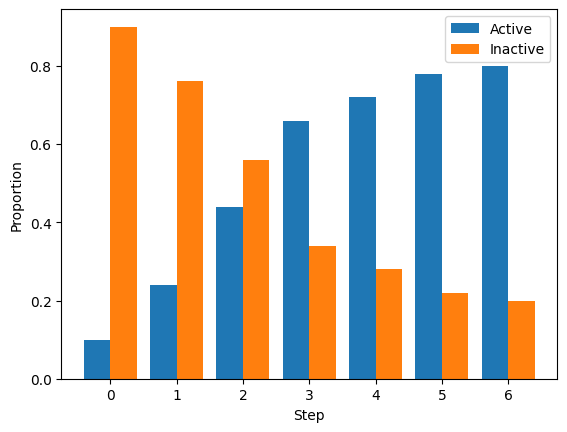

In [7]:
x = np.arange(len(active_distributions))
plt.bar(x-0.2, active_distributions, label='Active', width = 0.4)
plt.bar(x+0.2, inactive_distributions, label='Inactive', width = 0.4)
plt.xlabel('Step')
plt.ylabel('Proportion')
plt.legend()
plt.show()

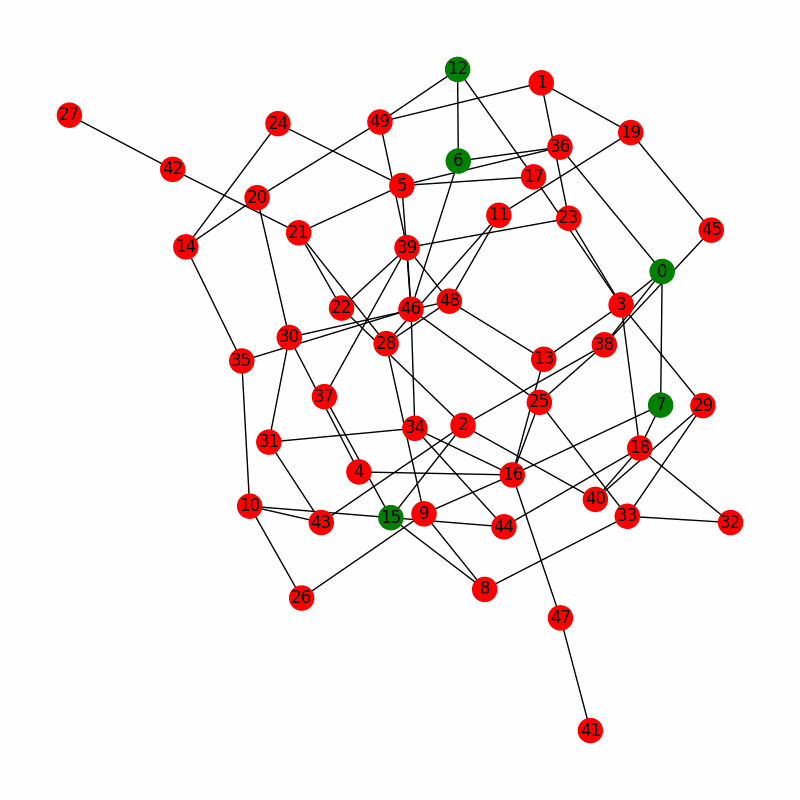

In [8]:
Image(filename='diffusion.gif')

## 4. Maximazing the Information Spread

1. Implement the algorithm to find the set S with size k that maximize the information spread based on the Greedy Algorithm proposed by Kempe (2003).
2. Find the set S with size k = 10 that maximize the influence for each Network taking into account that the probability $P_{v,w}$, i. e. probability that node w gets activated due to v, is given by a constant P = 0.5 for any node in the network.

In [9]:
G = random_network.copy()
S = set()
k = 10
current_influence_set = set()
while len(S) != k:
  best_node = None
  max_influence = 0
  for n in G.nodes():
    neighbor_set = set(G.neighbors(n))
    temp_influence_set = neighbor_set.union(current_influence_set)
    temp_influence = len(temp_influence_set)
    if temp_influence > max_influence:
      best_node = n
      max_influence = temp_influence
  S.add(best_node)
  current_influence_set.add(best_node)
  current_influence_set.update(G.neighbors(best_node))
print(S)


{2, 3, 4, 5, 39, 9, 14, 15, 16, 19}


In [10]:
os.makedirs("frames", exist_ok=True)

G = random_network.copy()
P = 0.5
nodes = G.nodes()
active_nodes = list(S)
inactive_nodes = [n for n in nodes if n not in active_nodes]

nx.set_node_attributes(G, {n: 'Inactive' for n in inactive_nodes}, 'state')
nx.set_node_attributes(G, {n: 'Active' for n in active_nodes}, 'state')

frame_index = 0

using_nodes = [n for n in active_nodes]
active_distributions = []
inactive_distributions = []
while True:
  active_distributions.append(len(active_nodes)/len(nodes))
  inactive_distributions.append(len(inactive_nodes)/len(nodes))

  # Save current frame
  save_frame(G, frame_index)
  frame_index += 1

  prev_active_nodes = [n for n in active_nodes]
  new_active_nodes = []
  for n in using_nodes:
    for nb in G.neighbors(n):
      if G.nodes[nb]['state'] == 'Inactive' and np.random.rand() < P:
        G.nodes[nb]['state'] = 'Active'
        new_active_nodes.append(nb)

  for n in new_active_nodes:
    active_nodes.append(n)
    inactive_nodes.remove(n)

  if len(prev_active_nodes) == len(active_nodes):
    break

  using_nodes = [n for n in new_active_nodes]

save_frame(G, frame_index)

# Create GIF
images = []
for i in range(frame_index + 1):
    images.append(imageio.imread(f"frames/frame_{i:03d}.png"))

imageio.mimsave('diffusion.gif', images, duration=500, loop = 0)

# Cleanup frames
import shutil
shutil.rmtree("frames")

print("GIF saved as 'diffusion.gif'")

<ipython-input-10-d082e8f8850e>:47: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"frames/frame_{i:03d}.png"))


GIF saved as 'diffusion.gif'


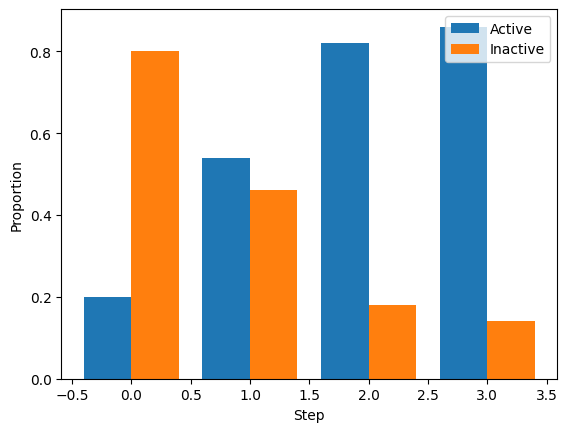

In [11]:
x = np.arange(len(active_distributions))
plt.bar(x-0.2, active_distributions, label='Active', width = 0.4)
plt.bar(x+0.2, inactive_distributions, label='Inactive', width = 0.4)
plt.xlabel('Step')
plt.ylabel('Proportion')
plt.legend()
plt.show()

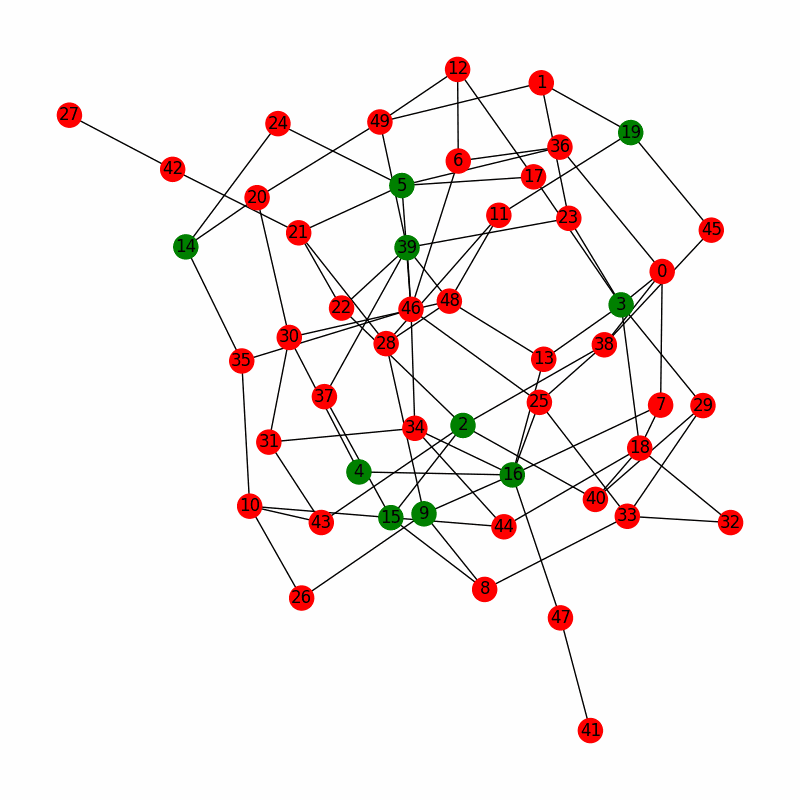

In [12]:
Image(filename='diffusion.gif')

## 5. Wrapping all together

1. Simulate an Erdos-Renyi and a Barabasi-Albert Network with 50 nodes and 150 nodes. Make a visualization of each network.
2. Find the set S with size k = 10 that maximize the influence for each Network taking into account the following hypotesis:
    * Hypotesis 1: The probability $P_{v,w}$, i. e. probability that node w gets activated due to w, is given by a constant P = 0.5 for any node in the network.
    * Hypotesis 2: Now, take into account that $P_{v,w}$ is given by the Node Similarity. Let $N(v_v)$ and $N(v_w)$ be the neighbors of vertices $v_v$ and $v_w$, respectively. The Jaccard Node Similarity between both nodes is given by:
$$\sigma_{Jaccard}(v_v, v_w) = \frac{|N(v_v) \cap N(v_w)|}{|N(v_v) \cup N(v_w)|}$$


In general, the definition of neighborhood $N(v_i)$ excludes the node itself $(v_i)$. This, however, leads to problems with similarity values because nodes that are connected and do not share a neighbor will be assigned zero similarity. This can be rectified by assuming that nodes are included in their own neighborhood.

> Note: You need to complete one simulation per hypotesis.

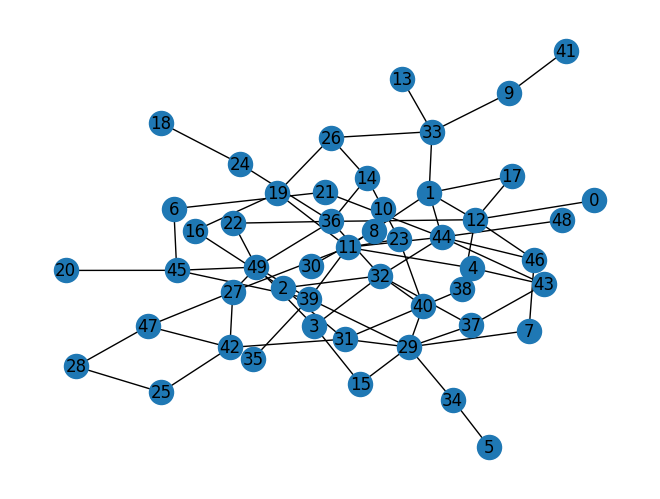

In [59]:
ER = nx.erdos_renyi_graph(50, 0.05)
BA = nx.barabasi_albert_graph(150, 4)
nx.draw(ER, pos=nx.kamada_kawai_layout(ER) , with_labels=True)

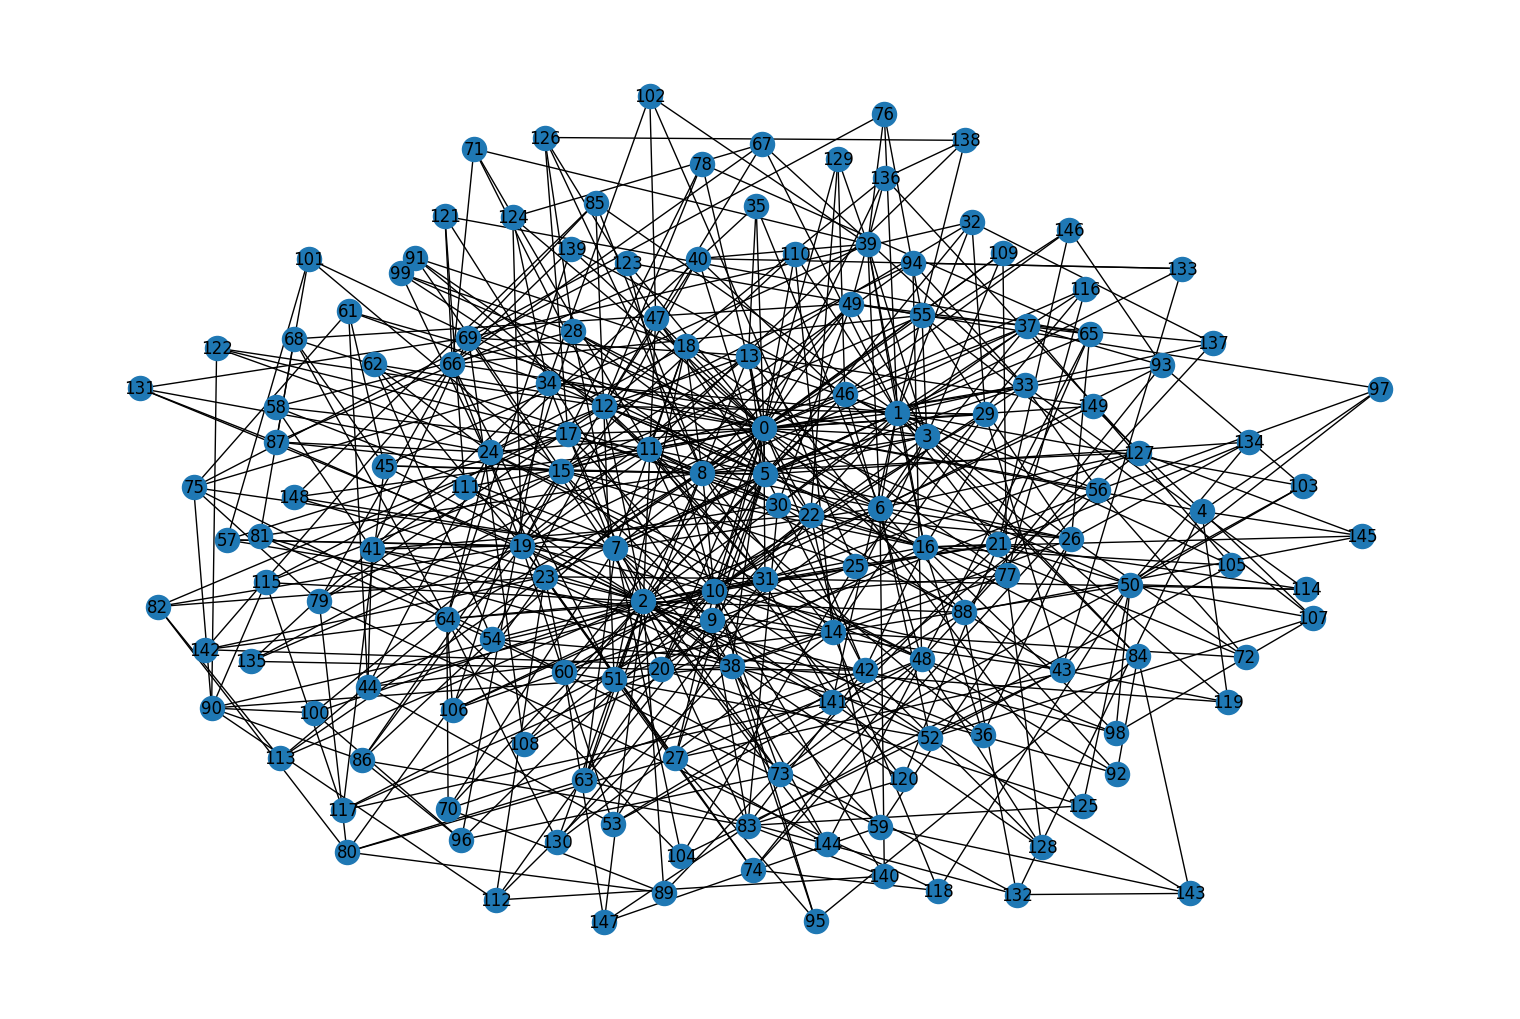

In [60]:
plt.figure(figsize=(15, 10))
nx.draw(BA, pos=nx.kamada_kawai_layout(BA) , with_labels=True)

In [61]:
# Erdos Hypothesis 1
G = ER.copy()
S = set()
k = 10
current_influence_set = set()
while len(S) != k:
  best_node = None
  max_influence = 0
  for n in G.nodes():
    if n in S:
      continue
    neighbor_set = set(G.neighbors(n))
    temp_influence_set = neighbor_set.union(current_influence_set)
    temp_influence = len(temp_influence_set)
    if temp_influence > max_influence:
      best_node = n
      max_influence = temp_influence
  S.add(best_node)
  current_influence_set.add(best_node)
  current_influence_set.update(G.neighbors(best_node))
print(S)

{32, 33, 36, 39, 11, 12, 44, 45, 25, 29}


In [62]:
os.makedirs("frames", exist_ok=True)
P = 0.5
nodes = G.nodes()
active_nodes = list(S)
inactive_nodes = [n for n in nodes if n not in active_nodes]

nx.set_node_attributes(G, {n: 'Inactive' for n in inactive_nodes}, 'state')
nx.set_node_attributes(G, {n: 'Active' for n in active_nodes}, 'state')

frame_index = 0

using_nodes = [n for n in active_nodes]
active_distributions = []
inactive_distributions = []
while True:
  active_distributions.append(len(active_nodes)/len(nodes))
  inactive_distributions.append(len(inactive_nodes)/len(nodes))

  # Save current frame
  save_frame(G, frame_index)
  frame_index += 1

  prev_active_nodes = [n for n in active_nodes]
  new_active_nodes = []
  for n in using_nodes:
    for nb in G.neighbors(n):
      if G.nodes[nb]['state'] == 'Inactive' and np.random.rand() < P:
        G.nodes[nb]['state'] = 'Active'
        new_active_nodes.append(nb)

  for n in new_active_nodes:
    active_nodes.append(n)
    inactive_nodes.remove(n)

  if len(prev_active_nodes) == len(active_nodes):
    break

  using_nodes = [n for n in new_active_nodes]

save_frame(G, frame_index)

# Create GIF
images = []
for i in range(frame_index + 1):
    images.append(imageio.imread(f"frames/frame_{i:03d}.png"))

imageio.mimsave('diffusion.gif', images, duration=500, loop = 0)

# Cleanup frames
import shutil
shutil.rmtree("frames")

print("GIF saved as 'diffusion.gif'")

<ipython-input-62-7a1ec89f07b6>:45: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"frames/frame_{i:03d}.png"))


GIF saved as 'diffusion.gif'


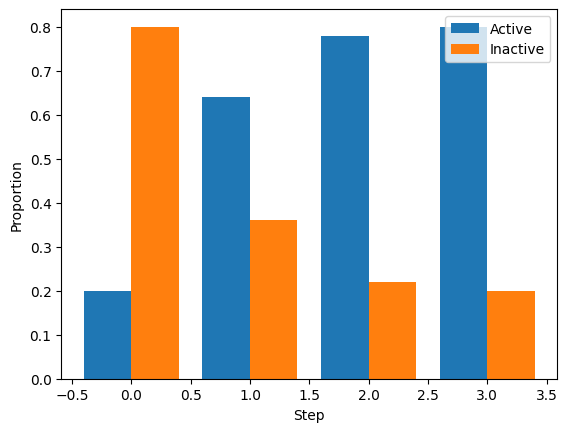

In [63]:
x = np.arange(len(active_distributions))
plt.bar(x-0.2, active_distributions, label='Active', width = 0.4)
plt.bar(x+0.2, inactive_distributions, label='Inactive', width = 0.4)
plt.xlabel('Step')
plt.ylabel('Proportion')
plt.legend()
plt.show()

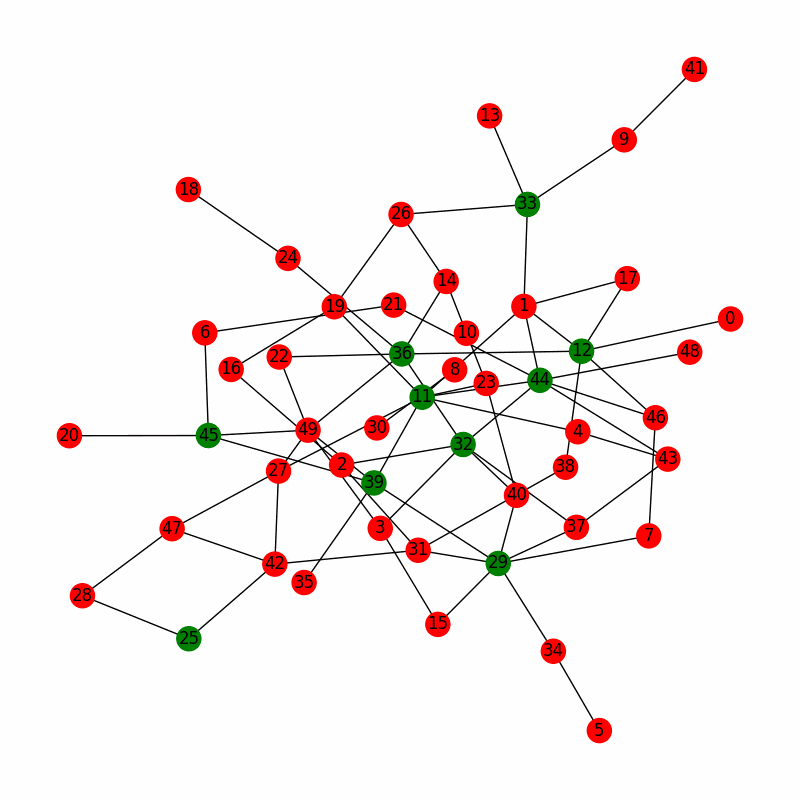

In [64]:
Image(filename='diffusion.gif')

In [66]:
# Barabasi Hypothesis 1
G = BA.copy()
S = set()
k = 10
current_influence_set = set()
while len(S) != k:
  best_node = None
  max_influence = 0
  for n in G.nodes():
    if n in S:
      continue
    neighbor_set = set(G.neighbors(n))
    temp_influence_set = neighbor_set.union(current_influence_set)
    temp_influence = len(temp_influence_set)
    if temp_influence > max_influence:
      best_node = n
      max_influence = temp_influence
  S.add(best_node)
  current_influence_set.add(best_node)
  current_influence_set.update(G.neighbors(best_node))
print(S)

{0, 1, 2, 38, 7, 8, 10, 12, 50, 19}


In [67]:
os.makedirs("frames", exist_ok=True)
P = 0.5
nodes = G.nodes()
active_nodes = list(S)
inactive_nodes = [n for n in nodes if n not in active_nodes]

nx.set_node_attributes(G, {n: 'Inactive' for n in inactive_nodes}, 'state')
nx.set_node_attributes(G, {n: 'Active' for n in active_nodes}, 'state')

frame_index = 0

using_nodes = [n for n in active_nodes]
active_distributions = []
inactive_distributions = []
while True:
  active_distributions.append(len(active_nodes)/len(nodes))
  inactive_distributions.append(len(inactive_nodes)/len(nodes))

  # Save current frame
  save_frame(G, frame_index)
  frame_index += 1

  prev_active_nodes = [n for n in active_nodes]
  new_active_nodes = []
  for n in using_nodes:
    for nb in G.neighbors(n):
      if G.nodes[nb]['state'] == 'Inactive' and np.random.rand() < P:
        G.nodes[nb]['state'] = 'Active'
        new_active_nodes.append(nb)

  for n in new_active_nodes:
    active_nodes.append(n)
    inactive_nodes.remove(n)

  if len(prev_active_nodes) == len(active_nodes):
    break

  using_nodes = [n for n in new_active_nodes]

save_frame(G, frame_index)

# Create GIF
images = []
for i in range(frame_index + 1):
    images.append(imageio.imread(f"frames/frame_{i:03d}.png"))

imageio.mimsave('diffusion.gif', images, duration=500, loop = 0)

# Cleanup frames
import shutil
shutil.rmtree("frames")

print("GIF saved as 'diffusion.gif'")

GIF saved as 'diffusion.gif'


<ipython-input-67-7a1ec89f07b6>:45: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"frames/frame_{i:03d}.png"))


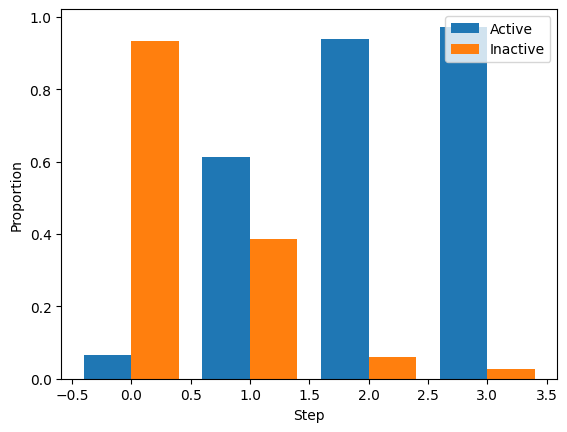

In [68]:
x = np.arange(len(active_distributions))
plt.bar(x-0.2, active_distributions, label='Active', width = 0.4)
plt.bar(x+0.2, inactive_distributions, label='Inactive', width = 0.4)
plt.xlabel('Step')
plt.ylabel('Proportion')
plt.legend()
plt.show()

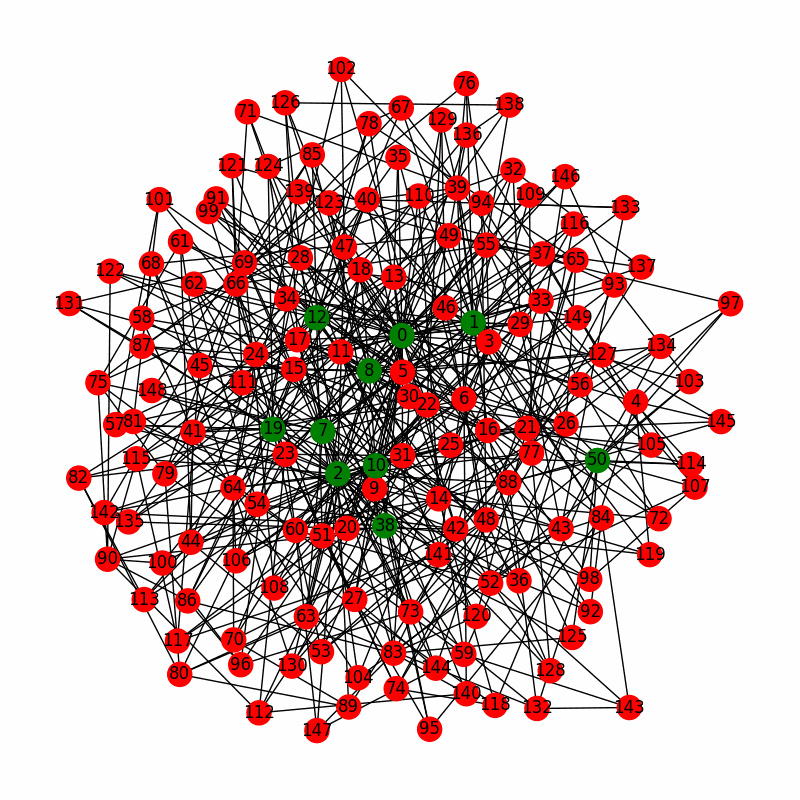

In [69]:
Image(filename='diffusion.gif')

In [70]:
def jaccard_coefficient(G, node1, node2):
  neighbor_set1 = set(G.neighbors(node1))
  neighbor_set1.add(node1)
  neighbor_set2 = set(G.neighbors(node2))
  neighbor_set2.add(node2)
  intersection = neighbor_set1.intersection(neighbor_set2)
  union = neighbor_set1.union(neighbor_set2)
  return len(intersection) / len(union)

In [73]:
# Erdos Hypothesis 2
G = ER.copy()
S = set()
k = 10
current_influence_set = set()
while len(S) != k:
  best_node = None
  max_influence = 0
  for n in G.nodes():
    if n in S:
      continue
    neighbor_set = set(G.neighbors(n))
    temp_influence_set = neighbor_set.union(current_influence_set)
    temp_influence = 0
    for v in temp_influence_set:
      jaccard = jaccard_coefficient(G, n, v)
      temp_influence += jaccard
    if temp_influence > max_influence:
      best_node = n
      max_influence = temp_influence
  S.add(best_node)
  current_influence_set.add(best_node)
  current_influence_set.update(G.neighbors(best_node))
print(S)

{32, 1, 36, 39, 11, 44, 45, 12, 49, 27}


In [74]:
os.makedirs("frames", exist_ok=True)
nodes = G.nodes()
active_nodes = list(S)
inactive_nodes = [n for n in nodes if n not in active_nodes]

nx.set_node_attributes(G, {n: 'Inactive' for n in inactive_nodes}, 'state')
nx.set_node_attributes(G, {n: 'Active' for n in active_nodes}, 'state')

frame_index = 0

using_nodes = [n for n in active_nodes]
active_distributions = []
inactive_distributions = []
while True:
  active_distributions.append(len(active_nodes)/len(nodes))
  inactive_distributions.append(len(inactive_nodes)/len(nodes))

  # Save current frame
  save_frame(G, frame_index)
  frame_index += 1

  prev_active_nodes = [n for n in active_nodes]
  new_active_nodes = []
  for n in using_nodes:
    for nb in G.neighbors(n):
      if G.nodes[nb]['state'] == 'Inactive' and np.random.rand() < jaccard_coefficient(G, n, nb):
        G.nodes[nb]['state'] = 'Active'
        new_active_nodes.append(nb)

  for n in new_active_nodes:
    active_nodes.append(n)
    inactive_nodes.remove(n)

  if len(prev_active_nodes) == len(active_nodes):
    break

  using_nodes = [n for n in new_active_nodes]

save_frame(G, frame_index)

# Create GIF
images = []
for i in range(frame_index + 1):
    images.append(imageio.imread(f"frames/frame_{i:03d}.png"))

imageio.mimsave('diffusion.gif', images, duration=500, loop = 0)

# Cleanup frames
import shutil
shutil.rmtree("frames")

print("GIF saved as 'diffusion.gif'")

GIF saved as 'diffusion.gif'


<ipython-input-74-8e9dd195eb12>:45: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"frames/frame_{i:03d}.png"))


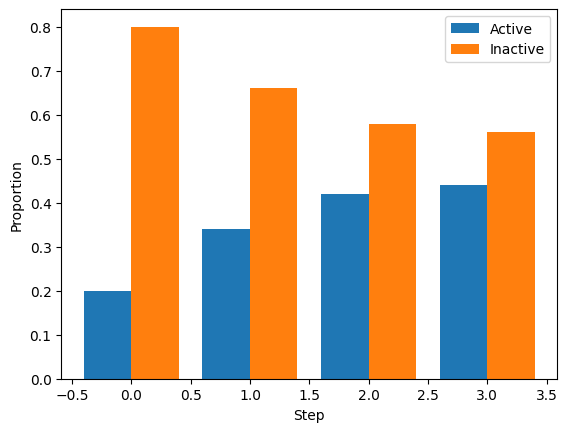

In [75]:
x = np.arange(len(active_distributions))
plt.bar(x-0.2, active_distributions, label='Active', width = 0.4)
plt.bar(x+0.2, inactive_distributions, label='Inactive', width = 0.4)
plt.xlabel('Step')
plt.ylabel('Proportion')
plt.legend()
plt.show()

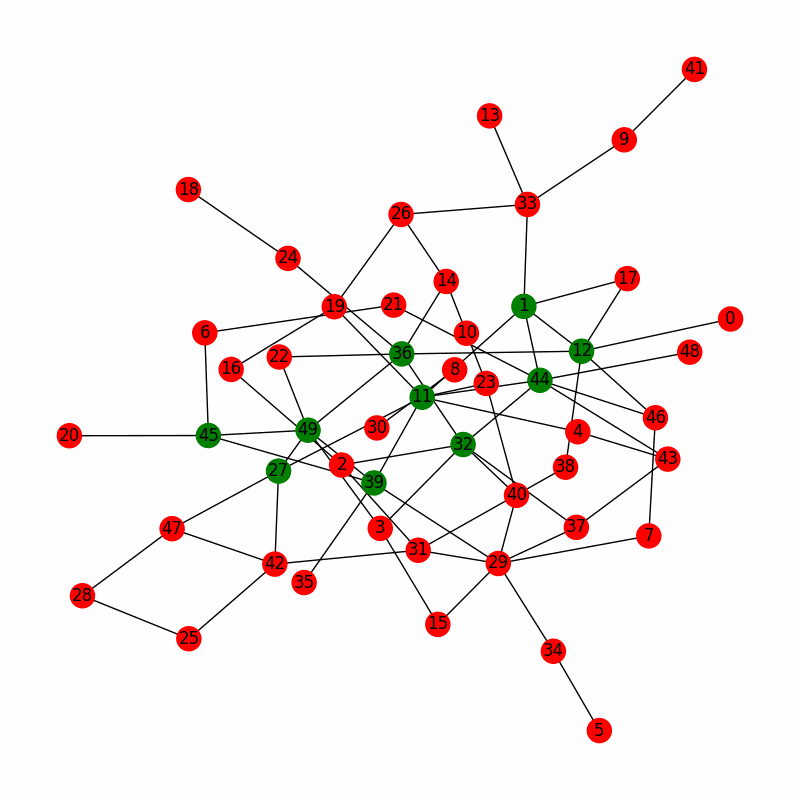

In [76]:
Image(filename='diffusion.gif')

In [77]:
# Barabasi Hypothesis 2
G = BA.copy()
S = set()
k = 10
current_influence_set = set()
while len(S) != k:
  best_node = None
  max_influence = 0
  for n in G.nodes():
    if n in S:
      continue
    neighbor_set = set(G.neighbors(n))
    temp_influence_set = neighbor_set.union(current_influence_set)
    temp_influence = 0
    for v in temp_influence_set:
      jaccard = jaccard_coefficient(G, n, v)
      temp_influence += jaccard
    if temp_influence > max_influence:
      best_node = n
      max_influence = temp_influence
  S.add(best_node)
  current_influence_set.add(best_node)
  current_influence_set.update(G.neighbors(best_node))
print(S)

{0, 2, 3, 5, 6, 8, 10, 47, 111, 23}


In [78]:
os.makedirs("frames", exist_ok=True)
nodes = G.nodes()
active_nodes = list(S)
inactive_nodes = [n for n in nodes if n not in active_nodes]

nx.set_node_attributes(G, {n: 'Inactive' for n in inactive_nodes}, 'state')
nx.set_node_attributes(G, {n: 'Active' for n in active_nodes}, 'state')

frame_index = 0

using_nodes = [n for n in active_nodes]
active_distributions = []
inactive_distributions = []
while True:
  active_distributions.append(len(active_nodes)/len(nodes))
  inactive_distributions.append(len(inactive_nodes)/len(nodes))

  # Save current frame
  save_frame(G, frame_index)
  frame_index += 1

  prev_active_nodes = [n for n in active_nodes]
  new_active_nodes = []
  for n in using_nodes:
    for nb in G.neighbors(n):
      if G.nodes[nb]['state'] == 'Inactive' and np.random.rand() < jaccard_coefficient(G, n, nb):
        G.nodes[nb]['state'] = 'Active'
        new_active_nodes.append(nb)

  for n in new_active_nodes:
    active_nodes.append(n)
    inactive_nodes.remove(n)

  if len(prev_active_nodes) == len(active_nodes):
    break

  using_nodes = [n for n in new_active_nodes]

save_frame(G, frame_index)

# Create GIF
images = []
for i in range(frame_index + 1):
    images.append(imageio.imread(f"frames/frame_{i:03d}.png"))

imageio.mimsave('diffusion.gif', images, duration=500, loop = 0)

# Cleanup frames
import shutil
shutil.rmtree("frames")

print("GIF saved as 'diffusion.gif'")

<ipython-input-78-75e24d011022>:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"frames/frame_{i:03d}.png"))


GIF saved as 'diffusion.gif'


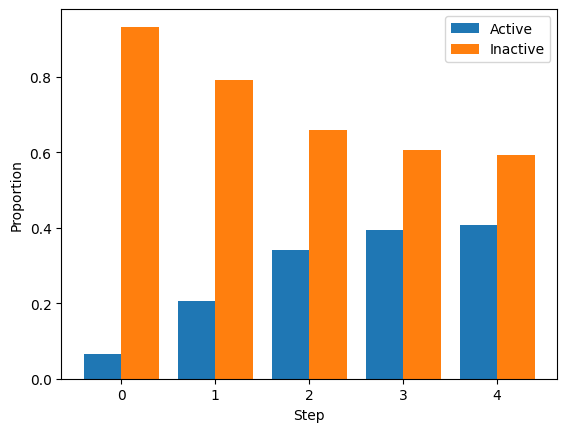

In [79]:
x = np.arange(len(active_distributions))
plt.bar(x-0.2, active_distributions, label='Active', width = 0.4)
plt.bar(x+0.2, inactive_distributions, label='Inactive', width = 0.4)
plt.xlabel('Step')
plt.ylabel('Proportion')
plt.legend()
plt.show()

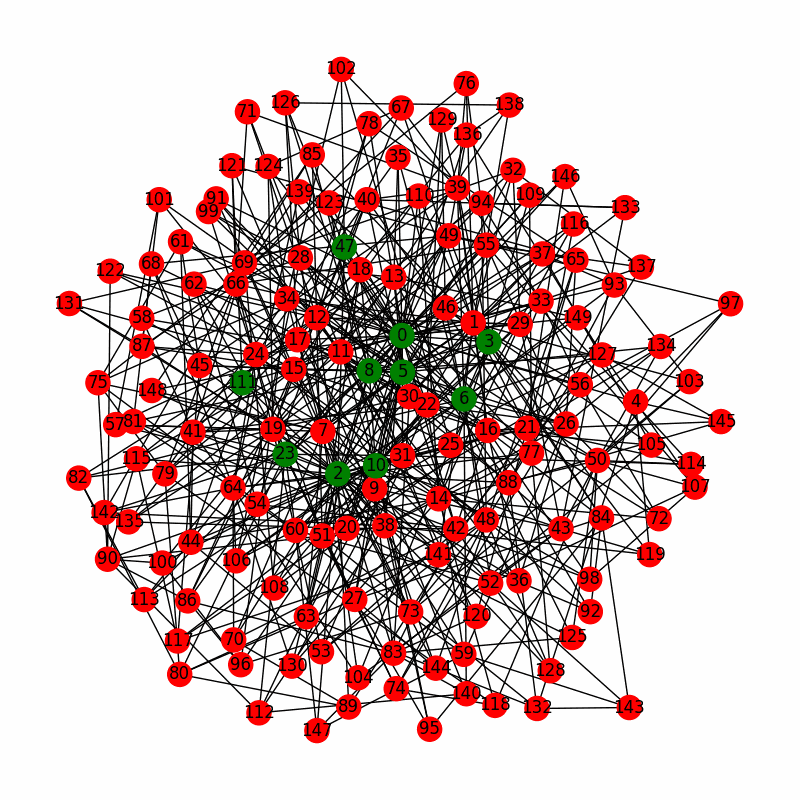

In [80]:
Image(filename='diffusion.gif')